<a href="https://colab.research.google.com/github/antonioravila/PoliticaExternaBrasileira/blob/main/Analise_de_tratados/Tratados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ditadura Militar Brasileira de 1964 - Análise de Tratados

## Bibliotecas

In [21]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

## Importando dados csv

In [22]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TCC/Dados/Tratados.csv', sep=';', on_bad_lines='skip')
df

,Título do Acordo,Outra Parte,Assuntos,Data Celebração,Status da Tramitação
0,Protocolo entre o Governo da República Federat...,Sérvia,Pagamentos e Resgates,27/05/1977,Em Vigor
1,"Ajuste Complementar, entre a República \nFeder...",Canadá,Cooperação Técnica,06/09/1978,Expirado
2,"Ajuste Complementar, entre a República \nFeder...",Canadá,Cooperação Técnica,06/09/1976,Expirado
3,Conclusão dos Contratos no Setor da \nEducação...,Guiné Bissau,Cooperação Artístico-cultural,19/06/1976,Em Vigor
4,"Acordo. p.t.n., de Sede entre os Estados Unido...",UNESCO,Acordo de Sede,07/06/1966,Em Vigor
...,...,...,...,...,...
1207,Declaração Cultural Conjunta Brasil-Argentina,Argentina,Declaração Conjunta,05/08/1964,Em Vigor
1208,Protocolo Adicional ao Tratado sobre Ligação \...,Bolívia,Transporte Ferroviário - Empréstimos,23/07/1964,Em Vigor
1209,Acordo para a Cessão de Terreno da \nEmbaixada...,Argentina,Relações Diplomáticas e Consulares,16/07/1964,Em Vigor
1210,Emenda ao 5º Acordo de Produtos Agrícolas de\n...,Estados Unidos,Produtos Agrícolas,15/05/1964,Em Vigor


## Tratamento dos dados

In [23]:
# Nota-se uma diferença entra as entradas e os 1117 valores não nulos de cada row
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1212 entries, 0 to 1211
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Título do Acordo      1117 non-null   object
 1   Outra Parte           1117 non-null   object
 2   Assuntos              1117 non-null   object
 3   Data Celebração       1117 non-null   object
 4   Status da Tramitação  1117 non-null   object
dtypes: object(5)
memory usage: 47.5+ KB


In [24]:
# Checando quais rows estão nulos no csv
df[df['Outra Parte'].isnull()]

,Título do Acordo,Outra Parte,Assuntos,Data Celebração,Status da Tramitação
52,NaN,NaN,NaN,NaN,NaN
62,NaN,NaN,NaN,NaN,NaN
71,NaN,NaN,NaN,NaN,NaN
80,NaN,NaN,NaN,NaN,NaN
91,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1157,NaN,NaN,NaN,NaN,NaN
1170,NaN,NaN,NaN,NaN,NaN
1182,NaN,NaN,NaN,NaN,NaN
1192,NaN,NaN,NaN,NaN,NaN


In [25]:
# Apagando rows nulas e checando se teve efeito
df.dropna(subset=['Outra Parte'], inplace=True)
df[df['Outra Parte'].isnull()]

,Título do Acordo,Outra Parte,Assuntos,Data Celebração,Status da Tramitação


In [26]:
df['Data Celebração'] = pd.to_datetime(df['Data Celebração'])
df

,Título do Acordo,Outra Parte,Assuntos,Data Celebração,Status da Tramitação
0,Protocolo entre o Governo da República Federat...,Sérvia,Pagamentos e Resgates,1977-05-27,Em Vigor
1,"Ajuste Complementar, entre a República \nFeder...",Canadá,Cooperação Técnica,1978-06-09,Expirado
2,"Ajuste Complementar, entre a República \nFeder...",Canadá,Cooperação Técnica,1976-06-09,Expirado
3,Conclusão dos Contratos no Setor da \nEducação...,Guiné Bissau,Cooperação Artístico-cultural,1976-06-19,Em Vigor
4,"Acordo. p.t.n., de Sede entre os Estados Unido...",UNESCO,Acordo de Sede,1966-07-06,Em Vigor
...,...,...,...,...,...
1207,Declaração Cultural Conjunta Brasil-Argentina,Argentina,Declaração Conjunta,1964-05-08,Em Vigor
1208,Protocolo Adicional ao Tratado sobre Ligação \...,Bolívia,Transporte Ferroviário - Empréstimos,1964-07-23,Em Vigor
1209,Acordo para a Cessão de Terreno da \nEmbaixada...,Argentina,Relações Diplomáticas e Consulares,1964-07-16,Em Vigor
1210,Emenda ao 5º Acordo de Produtos Agrícolas de\n...,Estados Unidos,Produtos Agrícolas,1964-05-15,Em Vigor


In [27]:
df['Outra Parte'] = np.where(df['Outra Parte'] == 'Banco Internacional para a Reconstrução e o Desenvolvimento', 'BIRD', df['Outra Parte'])

In [28]:
"""
- O método utilizado aqui para a criação das colunas (Com o nome do presidente 
do período) está longe do ideal e de algo otimizado
- A necessidade de criação de tantas linhas de código se deu pela 
impossibilidade de realizar tal processo por qualquer metodo que iterasse 
sobre as rows da coluna "Data Celebração".
- Mesmo transformando a coluna em timestamp anteriormente, ao iterar sobre ela
o Python dava o erro: "TypeError: '<=' not supported between instances of 
'Timestamp' and 'str'"
-Dessa forma, foram separados os dados em 4 diferentes dataframes, criadas as 
colunas com o nome do presidente em cada e juntados por meio do merge()
"""

df_castelo = df[df['Data Celebração'] >= '1964-04-15']
df_castelo = df_castelo[df_castelo['Data Celebração'] <= '1967-03-15']
df_castelo['Presidente'] = 'Castelo Branco'

df_costa_e_silva = df[df['Data Celebração'] >= '1967-03-16']
df_costa_e_silva = df_costa_e_silva[df_costa_e_silva['Data Celebração'] <= '1969-08-31']
df_costa_e_silva['Presidente'] = 'Costa e Silva'

df_medici = df[df['Data Celebração'] >= '1969-10-30']
df_medici = df_medici[df_medici['Data Celebração'] <= '1974-03-15']
df_medici['Presidente'] = 'Emilio Garrastazu Medici'

df_geisel = df[df['Data Celebração'] >= '1974-03-15']
df_geisel = df_geisel[df_geisel['Data Celebração'] <= '1979-03-15']
df_geisel['Presidente'] = 'Ernesto Geisel'

df = df_castelo.merge(right=df_costa_e_silva, how='outer').merge(right=df_medici, how='outer').merge(right=df_geisel, how='outer')
df

,Título do Acordo,Outra Parte,Assuntos,Data Celebração,Status da Tramitação,Presidente
0,"Acordo. p.t.n., de Sede entre os Estados Unido...",UNESCO,Acordo de Sede,1966-07-06,Em Vigor,Castelo Branco
1,Convenção para Evitar a Bitributação sobre o \...,Estados Unidos,"Aduanas, Impostos e Tarifas",1967-03-13,Superado,Castelo Branco
2,Convênio Complementar ao Acordo Básico de \nCo...,Alemanha,Cooperação Técnica,1967-02-28,Expirado,Castelo Branco
3,Acordo entre os Estados Unidos do Brasil e os ...,Estados Unidos,Defesa e Assuntos Militares,1967-01-27,Denunciado,Castelo Branco
4,Acordo Introduzindo Modificações no Acordo de ...,República Tcheca,Comércio,1967-01-26,Substituído,Castelo Branco
...,...,...,...,...,...,...
1079,Acordo Constitutivo de uma Comissão Mista \nEc...,Alemanha,Comissão Mista,1974-05-03,Em Vigor,Ernesto Geisel
1080,Nota Interpretativa do Anexo C do Tratado para...,Paraguai,Energia,1974-11-02,Em Vigor,Ernesto Geisel
1081,Nota de Intenção Paraguaia Referente a um \nPr...,Paraguai,Previdência Social,1974-11-02,Em Vigor,Ernesto Geisel
1082,Protocolo sobre Relações de Trabalho e \nPrevi...,Paraguai,Previdência Social,1974-11-02,Em Vigor,Ernesto Geisel


## Análise dos tratados

### Outra Parte

In [29]:
df_outraparte_castelo = pd.DataFrame(df_castelo['Outra Parte'].value_counts()).reset_index()
df_outraparte_castelo.columns = ['País', 'Quantidade de tratados assinados']
df_outraparte_castelo = df_outraparte_castelo.head(15)

df_outraparte_costa_e_silva = pd.DataFrame(df_costa_e_silva['Outra Parte'].value_counts()).reset_index()
df_outraparte_costa_e_silva.columns = ['País', 'Quantidade de tratados assinados']
df_outraparte_costa_e_silva = df_outraparte_costa_e_silva.head(15)

df_outraparte_medici = pd.DataFrame(df_medici['Outra Parte'].value_counts()).reset_index()
df_outraparte_medici.columns = ['País', 'Quantidade de tratados assinados']
df_outraparte_medici = df_outraparte_medici.head(15)

df_outraparte_geisel = pd.DataFrame(df_geisel['Outra Parte'].value_counts()).reset_index()
df_outraparte_geisel.columns = ['País', 'Quantidade de tratados assinados']
df_outraparte_geisel = df_outraparte_geisel.head(15)


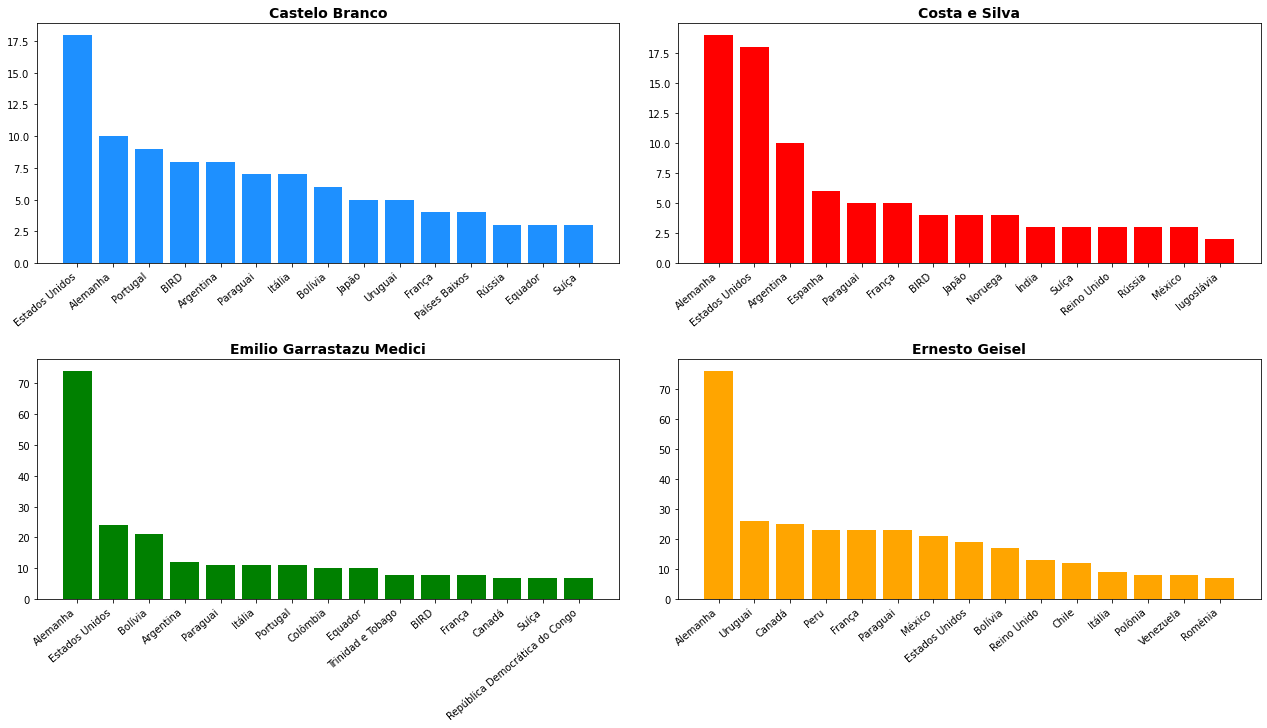

In [35]:
fig, axs = plt.subplots(2, 2, figsize=(20,10))

axs[0, 0].bar(df_outraparte_castelo['País'], 
              df_outraparte_castelo['Quantidade de tratados assinados'],
              color = "dodgerblue")
axs[0, 0].set_title('Castelo Branco', fontsize=14, weight = "bold")
axs[0, 0].set_xticklabels(labels = df_outraparte_castelo['País'], rotation = 40, horizontalalignment='right')

axs[0, 1].bar(df_outraparte_costa_e_silva['País'], 
              df_outraparte_costa_e_silva['Quantidade de tratados assinados'],
              color = "red")
axs[0, 1].set_title('Costa e Silva', fontsize=14, weight = "bold")
axs[0, 1].set_xticklabels(labels = df_outraparte_costa_e_silva['País'], rotation = 40, horizontalalignment='right')

axs[1, 0].bar(df_outraparte_medici['País'], 
              df_outraparte_medici['Quantidade de tratados assinados'],
              color = "green")
axs[1, 0].set_title('Emilio Garrastazu Medici', fontsize=14, weight = "bold")
axs[1, 0].set_xticklabels(labels = df_outraparte_medici['País'], rotation = 40, horizontalalignment='right')

axs[1, 1].bar(df_outraparte_geisel['País'], 
              df_outraparte_geisel['Quantidade de tratados assinados'],
              color='orange')
axs[1, 1].set_title('Ernesto Geisel', fontsize=14, weight = "bold")
axs[1, 1].set_xticklabels(labels = df_outraparte_geisel['País'], rotation = 40, horizontalalignment='right')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.95, 
                    top=0.9, 
                    wspace=0.1, 
                    hspace=0.4)

plt.show()

### Presidente

In [31]:
freq_Presidente = pd.DataFrame(df['Presidente'].value_counts())
freq_Presidente.reset_index(inplace=True)
freq_Presidente.rename(columns = {'index': 'Presidente', 'Presidente': 'Contagem'}, inplace=True)
freq_Presidente

,Presidente,Contagem
0,Ernesto Geisel,454
1,Emilio Garrastazu Medici,373
2,Castelo Branco,135
3,Costa e Silva,122


### Assuntos

In [32]:
freq_Assuntos = pd.DataFrame(df['Assuntos'].value_counts())
freq_Assuntos.reset_index(inplace=True)
freq_Assuntos.rename(columns = {'index': 'Assunto', 'Assunto': 'Contagem'}, inplace=True)
freq_Assuntos

,Assunto,Assuntos
0,Declaração Conjunta,115
1,Comércio,82
2,Cooperação Técnica,62
3,Cooperação Artístico-cultural,55
4,Transporte Aéreo,54
...,...,...
104,Agricultura - Cooperação Técnica - Cooperação ...,1
105,Comércio - Agricultura,1
106,Comissão Mista - Cooperação Técnica,1
107,Empréstimos - Pecuária,1
